# **Introduction to Data Science Project Final Report**

### An exploration of Minecraft Player Data


###### Elsie Jakeway (52395019)
###### Section 002
###### Summer Term 1, 2025

<mark> **TO DO:  double check the original start and end time stuff, read through rubric and slides to make sure that it is fine, put all of this into the Git File, fix the draft file name, get link, upload to gradescope.** Also need to fix the set seed and what data I am plotting.

## **Introduction**

<font color = A9A9A9> Background:

Ask any person who does work running servers about the importance of software licenses, and they will list the painful struggles that arise when the number of users exceeds the number of licenses. It is therefore important that the research group in the Computer Science Department at UBC ensures that they will have enough licenses to support the number of players using their MineCraft server at any time of the day as they conduct their research$^1$.

Two sets of data have been collected by the research group: one containing information about the server's users, and another containing information about the players' play sessions. The goal here is to use this data to predict how many licenses the department will need in order to support all of its users.

<font color = A9A9A9> Thesis: 

The analysis contained in this project aims to provide useful information to aid the Computer Science Department in demand forecasting. To do this, the project explores the question **"Can the time of day that a player begins a play session predict the duration of their session using the `sessions.csv` dataset?"**.

<font color = A9A9A9> Data Description:

This project utilizes the `sessions.csv` file collected by the Computer Science Department. This file contains data about the times of sessions from April 6, 2024 to September 26, 2024. The file contains 1536 rows of data with 5 variables. 

The variables contain the following data:

* `hashedEmail`
  * Contains the hashed email of a player
  * Character data type
* `start_time`
  * Contains the start time of a player's session.
  * Formatted as *day/month/year*  *hour : minute*
  * 24-hour time is used
  * Character data type
* `end_time`
  * Contains the end time of a player's session.
  * Formatted as *day/month/year*  *hour : minute*
  * 24-hour time is used
  * Character data type
* `original_start_time`
  * <mark>Contains the original start time (in seconds) of a player's session
  * Recorded in scientific notation
  * Double (numerical) data type
* `original_end_time`
  * <mark>Contains the original end time (in seconds) of a player's session
  * Recorded in scientific notation
  * Double (numerical) data type


Initially, it is clear that `start_time` and `end_time` will be challenging to deal with. These variables contain more than one value in each cell, and thus make the data set untidy. One of the first steps will be to tidy this data to ensure that each value has its own cell. 

There does not appear to be any missing data, however, it will need to be considered that missing data remains a possibility and will need to be handled accordingly.

A further complication to utilizing the `start_time` and `end_time` may arise due to play sessions spanning over *two* days, rather than being contained in just one day. This may require additional steps to be taken when calculating a duration from these times.

The precision of the `start_time` and `end_time` variables is only to the nearest minute, and the `original_start_time` and `original_end_time` variables have differing precision. This may restrict the precision of the analysis.


## **Methods & Results**

#### Loading

This analysis begins where all good analyses begin: with loading the libraries and setting the seed. The following code cell loads the libraries needed for this project, and sets the seed to allow for reproducible results.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
set.seed(2048)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, the data needs to be loaded from the `sessions.csv` file located in the working directory.

In [2]:
sessions_data <- read_csv("sessions.csv")

sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
⋮    ⋮                                                               
1533 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1534 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1535 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
     start_time       end_time         original_start_time original_end_time
1    30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2    17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3    25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
⋮    ⋮                ⋮                ⋮                   ⋮                
1533 28/07/2024 15:36 28/07/2024 15:57 1.72218e+12         1.72218e+12      
1534 25/07/2024 06:15 25/07/2024 06:22 1.72189e+12         1.72189e+12      
1535 20/05/2024 02:26 20/05/2024 02:45 1.71617e+12         1.71617e+12

#### Wrangling

This data needs to be wrangled with only the variables required for the analysis selected. 

The first problem has been encountered: the data is not tidy! There are too many values stored in the variables `start_time` and `end_time`. These need to be separated out. Only the values from `start_time` and `end_time` should be selected for the analysis.

In [3]:
sessions_tidy <- sessions_data |> 
                    select(start_time, end_time) |>
                    separate(col = start_time, into = c("date_start", "time_start"), sep = " ") |>
                    separate(col = end_time, into = c("date_end", "time_end"), sep = " ") |>
                    separate(col = date_start, into = c("day_start", "month_start", "year_start"), sep = "/") |>
                    separate(col = date_end, into = c("day_end", "month_end", "year_end"), sep = "/") |>
                    separate(col = time_start, into = c("hour_start", "minute_start"), sep = ":") |>
                    separate(col = time_end, into = c("hour_end", "minute_end"), sep = ":")
                    

sessions_tidy

day_start month_start year_start hour_start minute_start day_end month_end
1    30        06          2024       18         12           30      06       
2    17        06          2024       23         33           17      06       
3    25        07          2024       17         34           25      07       
⋮    ⋮         ⋮           ⋮          ⋮          ⋮            ⋮       ⋮        
1533 28        07          2024       15         36           28      07       
1534 25        07          2024       06         15           25      07       
1535 20        05          2024       02         26           20      05       
     year_end hour_end minute_end
1    2024     18       24        
2    2024     23       46        
3    2024     17       57        
⋮    ⋮        ⋮        ⋮         
1533 2024     15       57        
1534 2024     06       22        
1535 2024     02       45

Despite the previous tidying steps, there is still tidying that needs to be done. 

The second problem has been encountered: all of the variables contain numbers, yet they are stored as character data types. They will need to be a numerical data type so that further manipulations will work properly. 

To make this process easier, the variables containing the month and year can be removed, since this analysis focuses only on the *time of day* that a play session begins at.

In [4]:
sessions_numeric <- sessions_tidy |>
        select(-month_start, -year_start, -year_end, -month_end) |>
        mutate(
            day_start = as.numeric(day_start), 
               minute_start = as.numeric(minute_start), 
               hour_start = as.numeric(hour_start),
               day_end = as.numeric(day_end),
               hour_end = as.numeric(hour_end),
               minute_end = as.numeric(minute_end)
              )
sessions_numeric

day_start hour_start minute_start day_end hour_end minute_end
1    30        18         12           30      18       24        
2    17        23         33           17      23       46        
3    25        17         34           25      17       57        
⋮    ⋮         ⋮          ⋮            ⋮       ⋮        ⋮         
1533 28        15         36           28      15       57        
1534 25         6         15           25       6       22        
1535 20         2         26           20       2       45

A new column for the `duration` of gameplay is needed. The third problem has been encountered: some of the play sessions begin before midnight, and end after midnight! Thus, the duration spans across two days, rather than just one day. This makes it more challenging to find the duration since the start time cannot simply be subtracted from the end time. 

To handle this problem, two datasets will be created: one with durations that are within one day, and one with durations that span multiple days.

In [5]:
sessions_one_day <- sessions_numeric |>
        filter(day_end - day_start == 0)

sessions_more_than_day <- sessions_numeric |>
        filter(day_end - day_start != 0)

sessions_one_day
sessions_more_than_day

day_start hour_start minute_start day_end hour_end minute_end
1    30        18         12           30      18       24        
2    17        23         33           17      23       46        
3    25        17         34           25      17       57        
⋮    ⋮         ⋮          ⋮            ⋮       ⋮        ⋮         
1439 28        15         36           28      15       57        
1440 25         6         15           25       6       22        
1441 20         2         26           20       2       45

day_start hour_start minute_start day_end hour_end minute_end
1  12        23         23           13      0        14        
2  29        21         26           30      0         0        
3  27        23         30           28      0        23        
⋮  ⋮         ⋮          ⋮            ⋮       ⋮        ⋮         
90  3        22         33            4      0        51        
91 18        21         54           19      2         9        
92 28        23         31           29      0        15

Next, the duration can be computed separately for each case. For simplicity, the duration is converted to minutes. The only columns needed are the starting hour, the starting minute, and the duration. The two resulting tibbles can be combined into one. 

In [6]:
one_day_duration <- sessions_one_day |>
        mutate(duration_in_minutes = (hour_end * 60 + minute_end) - (hour_start *60 + minute_start) ) |>
        select(hour_start, minute_start, duration_in_minutes)

more_than_day_duration <- sessions_more_than_day |>
        mutate(hours_before_midnight = 24 - hour_start, 
               minutes_before_midnight = 60 - minute_start, 
               duration_in_minutes = hours_before_midnight * 60 + minutes_before_midnight + hour_end * 60 + minute_end) |>
        select(hour_start, minute_start, duration_in_minutes)


sessions_joined <- full_join(one_day_duration, more_than_day_duration)

sessions_joined

Joining with `by = join_by(hour_start, minute_start, duration_in_minutes)`


hour_start minute_start duration_in_minutes
1    18         12           12                 
2    23         33           13                 
3    17         34           23                 
⋮    ⋮          ⋮            ⋮                  
1531 22         33           198                
1532 21         54           315                
1533 23         31           104

This analysis will use a *regression* model to predict the duration based on the time of day, and it needs to be able to predict based on the *minute*, not just on the hour. Thus, a new column will be added that displays the time of day in minutes.

In [7]:
sessions_in_minutes <- sessions_joined |>
        mutate(minute_of_day = hour_start * 60 + minute_start)

sessions_in_minutes 

hour_start minute_start duration_in_minutes minute_of_day
1    18         12           12                  1092         
2    23         33           13                  1413         
3    17         34           23                  1054         
⋮    ⋮          ⋮            ⋮                   ⋮            
1531 22         33           198                 1353         
1532 21         54           315                 1314         
1533 23         31           104                 1411

#### Exploring

Before creating a model to answer the question of this analysis, it will be useful to have a better understanding of the data and the relationship between the predictor and response variables.

Thus, it is important to get a rough idea of what the relationship between the time of day, and the duration played looks like. To begin, the hour of the day will be examined, and the average duration for that hour will be calculated. This can then be plotted in a bar graph to show the hourly average.

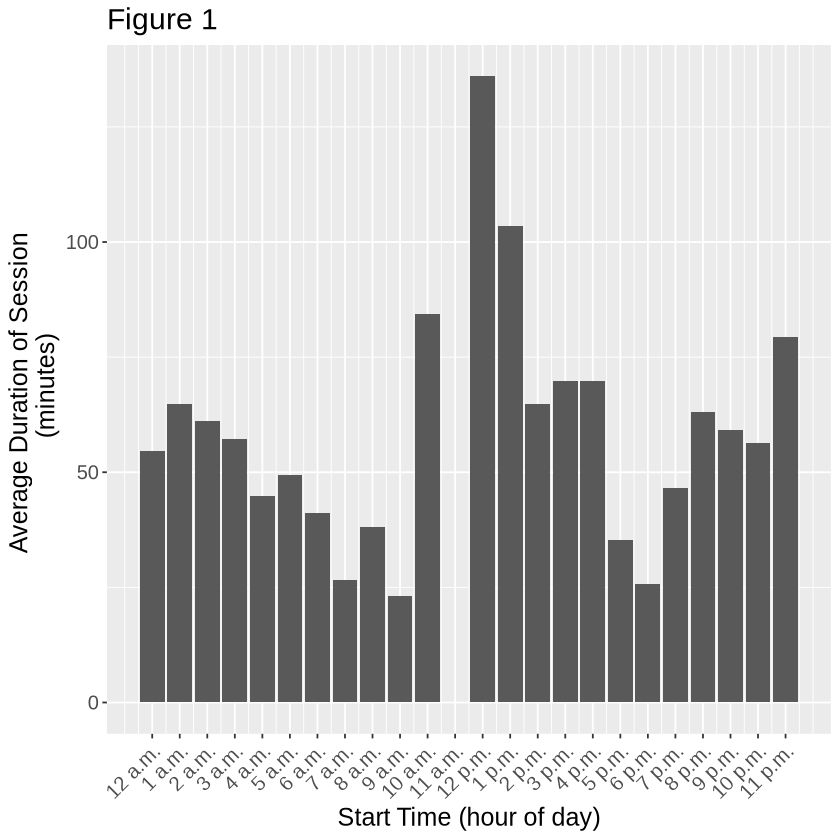

In [8]:
options(rep.plot.height = 6, rep.plot.width = 9)

average_play_time <- sessions_joined |>
        group_by(hour_start) |>
        summarize(hourly_average = mean(duration_in_minutes, ns.rm = TRUE))


x_hours = c("12 a.m.", "1 a.m.","2 a.m.","3 a.m.","4 a.m.","5 a.m.","6 a.m.","7 a.m.","8 a.m.","9 a.m.","10 a.m.","11 a.m.",
           "12 p.m.", "1 p.m.","2 p.m.","3 p.m.","4 p.m.","5 p.m.","6 p.m.","7 p.m.","8 p.m.","9 p.m.","10 p.m.","11 p.m.")

hourly_average_plot <- average_play_time |>
        ggplot(aes(x = hour_start, y = hourly_average)) +
        geom_bar(stat = "identity", ) + 
        labs(x = "Start Time (hour of day)", 
             y = "Average Duration of Session \n (minutes)") + 
        ggtitle("Figure 1") +
        theme(text = element_text(size = 15)) +
        scale_x_continuous(breaks = c(0:23), labels = x_hours) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

hourly_average_plot

From Figure 1, it appears that players that begin between 10 a.m. and 1 p.m. tend to play for longer durations than other times of the day. It also appears that the playtime is decreases in the morning, and increases around noon.

But this is interesting, as it shows that there was no data for 11:00 a.m., which is unexpected! However, careful inspection of the original csv file shows that, infact, there is no data for a start time of 11:00 am. 

To get a better understanding of the data and for which times of the day there is the most data for, a plot of the number of players at each hour of the day can be constructed:

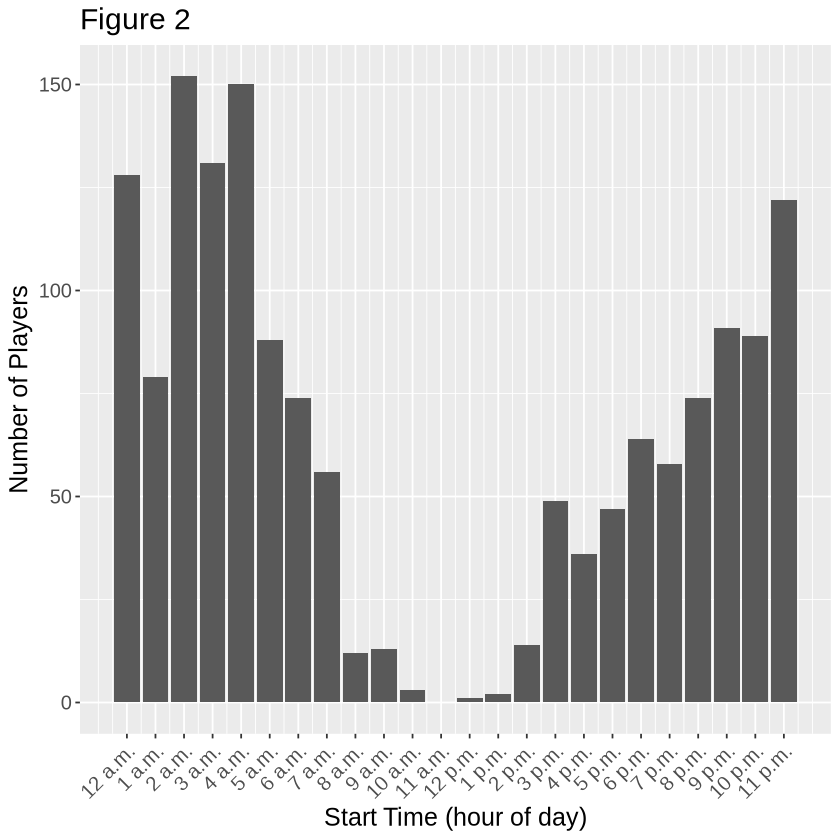

In [9]:
players_per_hour <- sessions_joined |>
        group_by(hour_start) |>
        summarize(num_players = n())

num_players_plot <- players_per_hour |>
        ggplot(aes(x = hour_start, y = num_players)) +
        geom_bar(stat = "identity", ) + 
        labs(x = "Start Time (hour of day)", 
             y = "Number of Players") + 
        ggtitle("Figure 2") +
        theme(text = element_text(size = 15)) +
        scale_x_continuous(breaks = c(0:23), labels = x_hours) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

num_players_plot

Comparing these plots leads to an interesting observation:

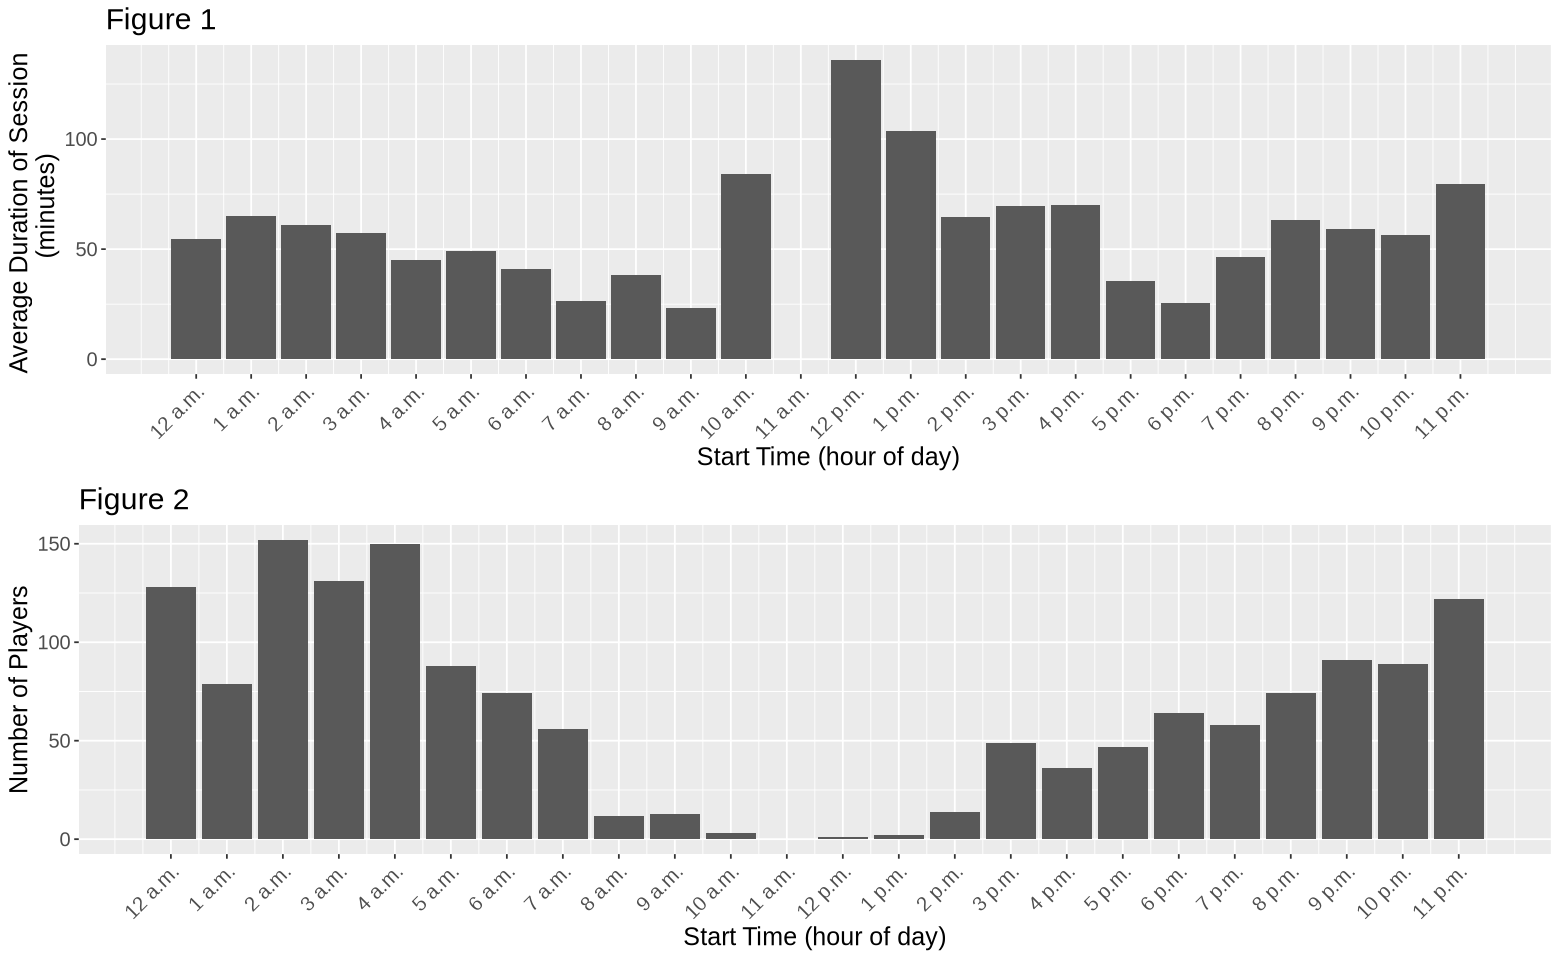

In [10]:
options(repr.plot.width = 13, repr.plot.height = 8)
plot_grid(hourly_average_plot, num_players_plot, nrow = 2)

The times of day with the fewest players also seem to correspond to the times of day with the highest average session duration, and the times of day with the most players seem to correspond to lower session durations.

To get an even better idea of what the relationship between time of day and the the duraiton of play time looks like, a scatter plot of the minute of the day, and the duration of a session, will now be examined.

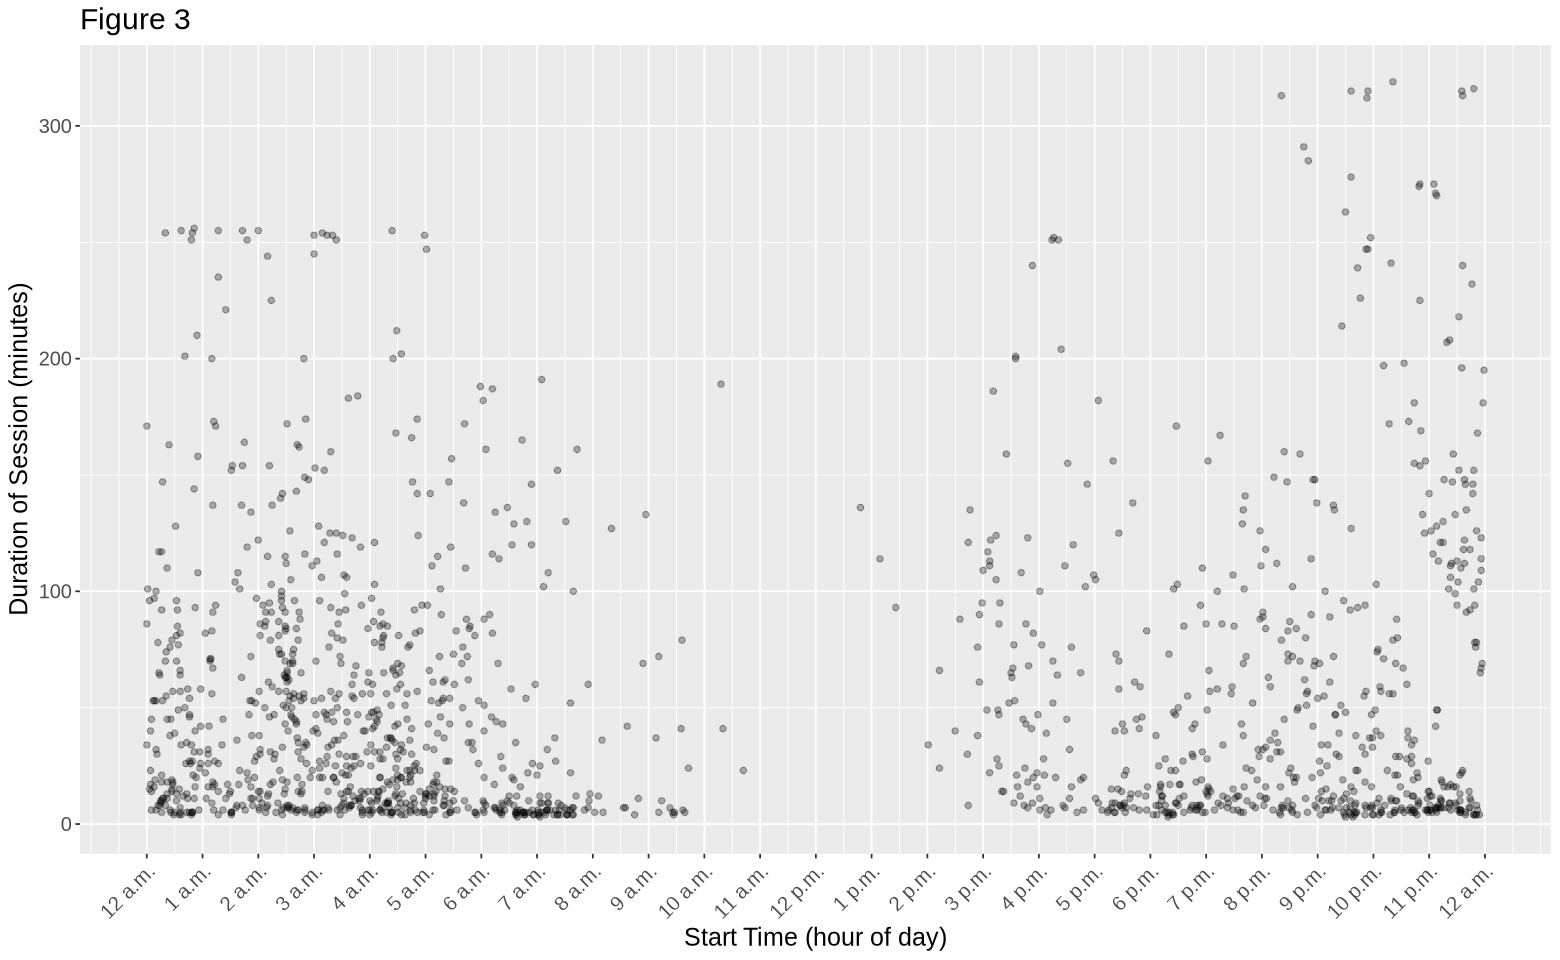

In [11]:
options(rep.plot.height = 6, rep.plot.width = 9)

scatter_breaks = seq(from = 0, to = 1440, by = 60)

extra_x_hours <- c(x_hours, "12 a.m.")

minute_plot <- sessions_in_minutes |>
        ggplot(aes(x = minute_of_day, y = duration_in_minutes)) +
        geom_point(alpha = 0.3) +
        labs(x = 'Start Time (hour of day)', y = "Duration of Session (minutes)") +
        ggtitle("Figure 3") +
        theme(text = element_text(size = 15)) + 
        scale_x_continuous(breaks = scatter_breaks, labels = extra_x_hours) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))



minute_plot

There appears to be very little data between 10 a.m. and 2 p.m.. This will put limitations on the selected model since the nearest neighbours found will tend to be the same for many of the points between these sparse regions of the data set.

Additionally, this plot assumes that the times recorded in the csv file reflect the time zone of the server, and not the time zones of individual players.

There is no clear linear trend in this data. Thus, a knn regression will be used to create a model that can be used to predict the duration of a session based on the minute of the day that the session begins.

#### Modelling

To begin, the data needs to be split into a training set and a testing set. 75% of the data will be used for training, and 25% for testing. The strat variable will be set to the duration.

In [13]:
set.seed(2048)
sessions_split <- initial_split(sessions_in_minutes, prop = 0.75, strata = duration_in_minutes)

sessions_training <- training(sessions_split)

sessions_testing <- testing(sessions_split)

A recipe and model for knn regression is needed. The data needs to be centered and scaled, and the best number of neighbours to use will be determined in the next step.

In [14]:
set.seed(2048)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("regression")


knn_recipe <- recipe(duration_in_minutes ~ minute_of_day, data = sessions_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_workflow <- workflow() |>
                add_model(knn_spec) |>
                add_recipe(knn_recipe)

A five-fold cross validation will be used to determine the value for *k* with the lowest RMSE. The numbers of neighbours tested will be those from 1 to 101, in increments of fives. The RMSE for this data is collected and plotted.

[1] 76

[1] 60.06518

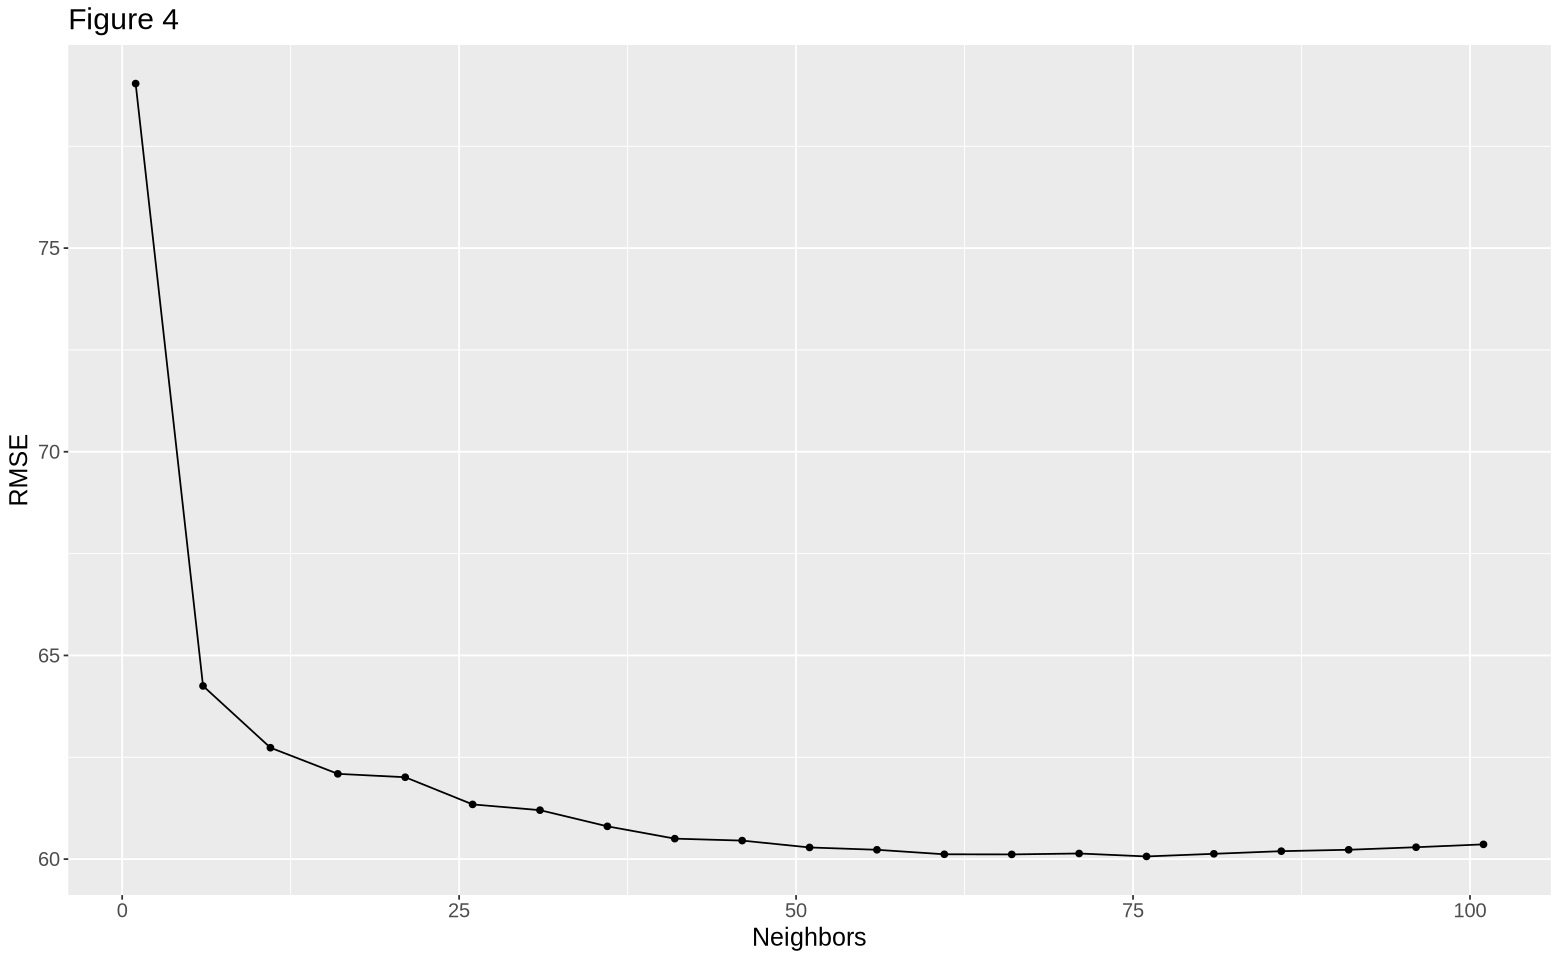

In [15]:
set.seed(2048)

knn_vfold <- vfold_cv(sessions_training, v = 5, strata = duration_in_minutes)

k_vals <- tibble(neighbors = seq(from = 1, to = 101, by = 5))


sessions_workflow <- knn_workflow |>
                    tune_grid(resamples = knn_vfold, grid = k_vals)
                    

sessions_workflow_results <- sessions_workflow |>
                             collect_metrics() |>
                             filter(.metric == "rmse")

k_plot <- sessions_workflow_results |>
            ggplot(aes(x = neighbors, y = mean)) +
            geom_point() +
            geom_line() +
            labs(x = "Neighbors", y = "RMSE") +
            theme(text = element_text(size = 15)) +
            ggtitle("Figure 4")

best_k <- sessions_workflow_results |>
            filter(mean == min(mean)) |>
            select(neighbors) |>
            pull()

lowest_rmse <- sessions_workflow_results |>
            filter(mean == min(mean)) |>
            select(mean) |>
            pull()

k_plot
best_k
lowest_rmse

The best k value to use is 76. This yields an RMSE of 60.07.

A workflow can now be created to fit the data using the k-value that was just determined.

In [16]:
set.seed(2048)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
            set_engine("kknn") |>
            set_mode("regression")


best_workflow <- workflow() |>
                add_recipe(knn_recipe) |>
                add_model(best_spec) |>
                fit(data = sessions_training)

best_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(76,     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 44.50111
Minimal mean squared error: 3573.531
Best kernel: rectangular
Best k: 76

#### Predicting

Now the workflow can be applied to the test set, and the RMSPE can be determined.

In [17]:
set.seed(2048)

test_prediction <- best_workflow |>
                    predict(sessions_testing) |>
                    bind_cols(sessions_testing) |>
                    metrics(truth = duration_in_minutes, estimate = .pred) |>
                    filter(.metric == "rmse")


test_prediction

.metric .estimator .estimate
1 rmse    standard   60.00004

The RMSPE value of the model predicting on the test set is 60.00.

To better understand these results, the prediction is plotted in purple on top of the dataset.

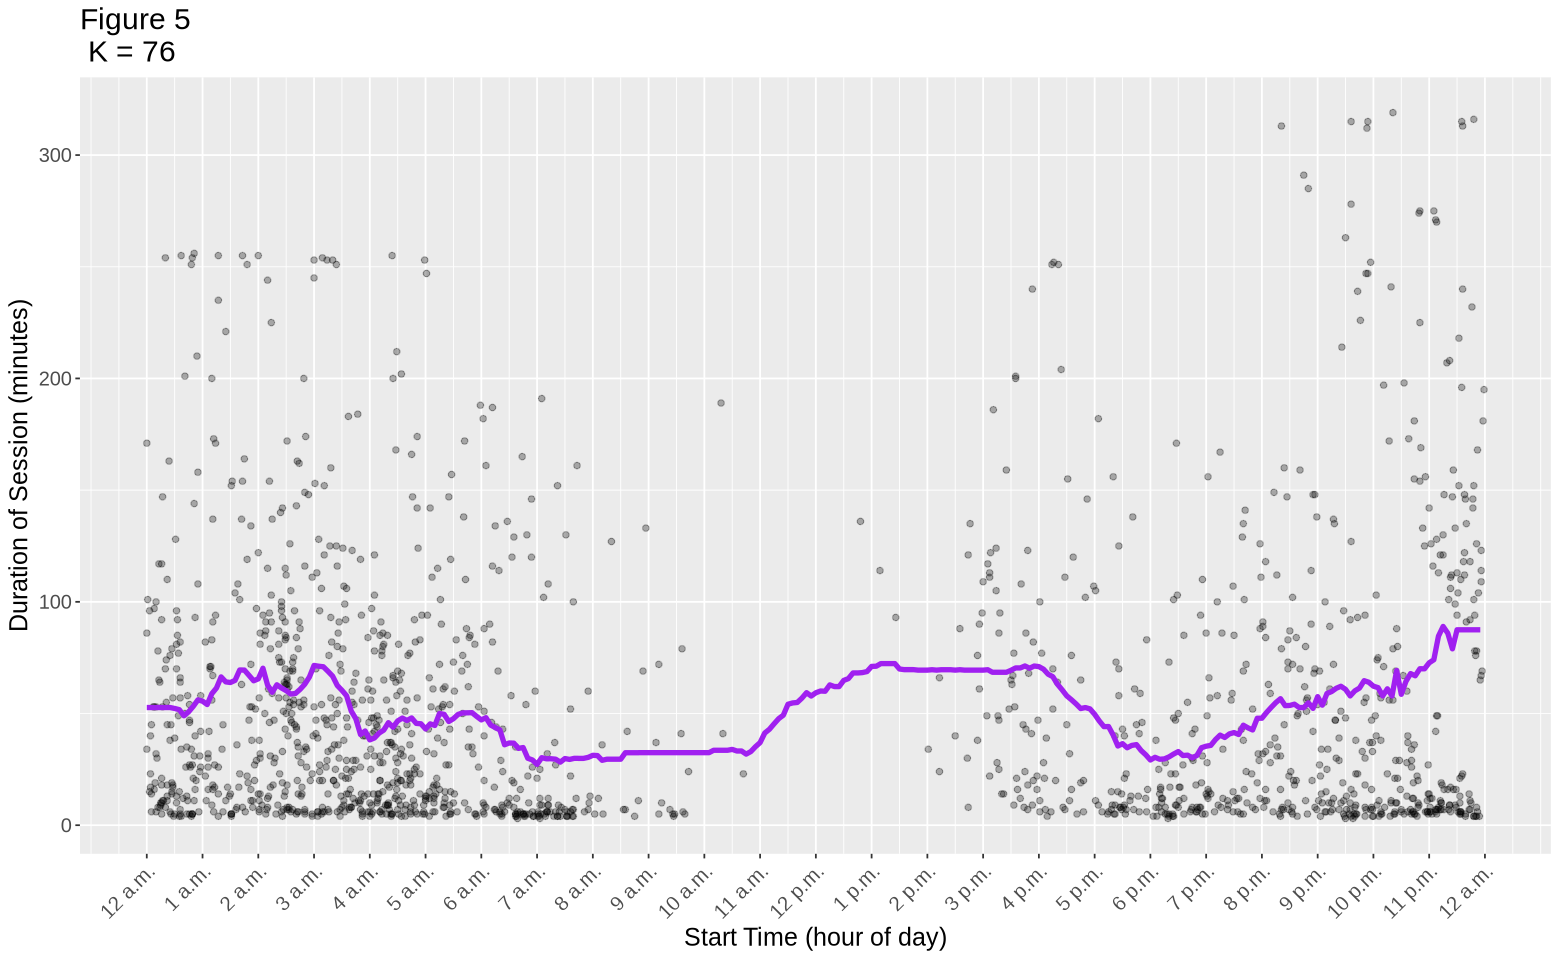

In [19]:
set.seed(2048)
grid_of_estimates <- tibble(minute_of_day = seq(from = sessions_in_minutes |> select(minute_of_day)|> min(), 
                                                      to = sessions_in_minutes |> select(minute_of_day) |> max(), 
                                                      by = 5))

snazzy_predictions <- best_workflow |>
                        predict(grid_of_estimates) |>
                         bind_cols(grid_of_estimates)


plot_with_line <- minute_plot +
                geom_line(data = snazzy_predictions, 
                         mapping = aes(x = minute_of_day, .pred),
                         color = "purple",
                         linewidth = 1.5) +
                        ggtitle("Figure 5 \n K = 76") 


plot_with_line

Another potential limitation of this model can become clear from this plot: the leftmost and rightmost ends of the line do not predict the same duration, despite the cyclical nature of the time of day. A better model may be able to capture this aspect of the data and may offer lower error on the prediction.

## **Discussion**

#### Visualizations

This analysis examined the use of a players' starting time of day to predict the duration of their play session using knn regression for the prediction of the quantiative variable. Through plots such as Figure 1 and Figure 3, it became clear that the relationship between the duration and the start time was a non-linear relationship. This is to be expected, as it would be surprising to instead discover a linear relationship in the public's MineCraft habits. A surprising result does emerge from Figure 1 however. Although the average session duration is at its highest for starting hours of 10:00 a.m., 12:00 p.m., and 1:00 p.m., there is no data for any players beginning a session between 11:00 a.m. and 12:00 p.m.. It was surprising that 11:00 a.m. did not follow the general pattern of having a higher average duration around noon. To understand the reason for this would require a deeper understanding of the participants of this study and other factors influencing their MineCraft routines. However, it may be important to note that this analysis focused on only the *starting* times of a play session, and thus more information may be gained from understanding which hours of the day had the most session overlap. Such an analysis may aid in answering the question of why no players were observed to begin playing at 11:00 a.m., and why times around noon had relatively few players.

The comparison of Figure 1 and Figure 2 also yields some surprising observations, as this comparison reveals that the hours of the day with the longest session duration also appear to be the times of day with the fewest players.

#### Models

This analysis used a five-fold cross validation to determine the number of neighbours yielding the lowest RMSE value. A model using this k-value was used to fit the test data. The test data was found to have an RMSPE value of 60. This is the same as the RMSE value, meaning that the model performs about the same on the test set as it did on the training set. This error of about one hour is not too surprising, as it can be seen from Figure 5 that many of the play sessions do not last for more than 50 minutes, but there are still many sessions that last for over 200 minutes. 

The results of this analysis may find uses in forecasting demand for the MineCraft servers, allowing individuals running such servers to predict how long each player will require the use of a liscense to an accuracy of approximately one hour. Further investigation and analysis would be required to further refine this prediction and increase the accuracy. 

Future analyses may benifit from considering some of the following quesitons:

* Do the characteristics of a player influence the duration of their session at particular times of the day?
  * (For example, does the age of the player influence the times of day that they will play the longest?)
* Does the day of the week influence the duration of a session at various times of the day?
  * (For example, weekends vs weekdays)
* Can the time of day predict the number of players, and does the number of players active at once influence the session duration?

## **References**

1.    Chen, D. (2025, May 27). Data Science Project [Canvas Assignment Description]. Canvas. https://canvas.ubc.ca/